In [1]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_lfw_people
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neural_network import MLPClassifier
import numpy as np
import os,cv2

In [2]:
def plot_gallery(images,titles,h,w,row=3,col=4):
    plt.figure(figsize=(1.8*col,2.4*row))
    plt.subplots_adjust(bottom=0,left=.01,right=0.99,top=.90,hspace=.35)
    for i in range(row*col):
        plt.subplot(row,col,i+1)
        plt.imshow(images[i].reshape((h,w)),cmap=plt.cm.gray)
        plt.title(titles[i],size=12)
        plt.xticks(())
        plt.yticks(())

In [7]:
dir=r"dataset\faces"
y,x,target,class_name=[],[],[],[]
p_id=0
h=w=300
samples=0

for p_name in os.listdir(dir):
    path=dir+"/"+p_name+"/"
    class_name.append(p_name)
    for i_name in os.listdir(path):
        i_path=path+i_name
        img=cv2.imread(i_path)
        gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
        resized_img=cv2.resize(gray,(h,w))
        v=resized_img.flatten()
        x.append(v)
        samples=samples+1
        y.append(p_id)
        target.append(p_name)
    p_id=p_id+1
    
y=np.array(y)
x=np.array(x)
target=np.array(target)
features=x.shape[1]
print(y.shape,x.shape,target.shape)
print("Number of samples:",samples)



(450,) (450, 90000) (450,)
Number of samples: 450


In [9]:
n_classes=target.shape[0]
n_classes

450

In [10]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.25,random_state=42)

top 150 eigenfaces from 337 faces


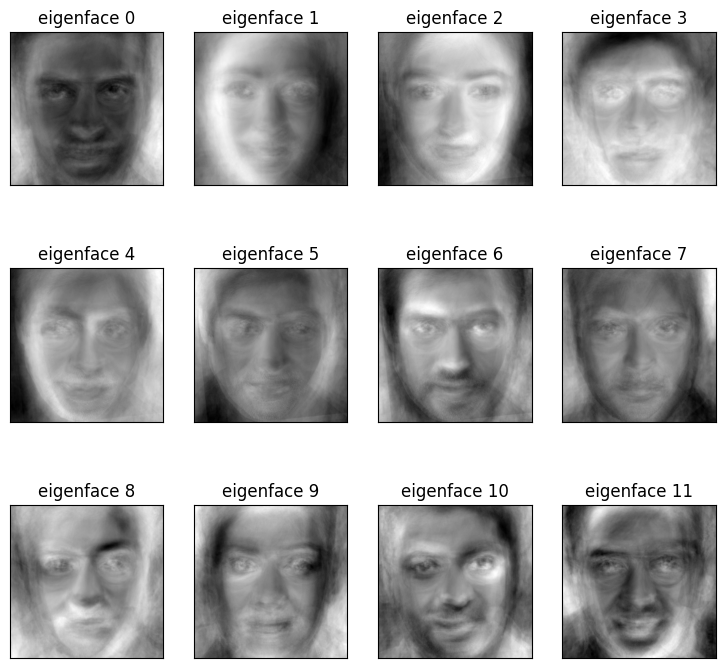

projecting data on eignefaces orthonormal basis
(337, 150) (113, 150)


In [11]:
n_components=150
print(f"top {n_components} eigenfaces from {xtrain.shape[0]} faces")
pca=PCA(n_components=n_components,svd_solver='randomized',whiten=True).fit(xtrain)
eigenfaces=pca.components_.reshape((n_components,h,w))
eigenface_titles=['eigenface %d' % i for i in range(eigenfaces.shape[0])]
plot_gallery(eigenfaces,eigenface_titles,h,w)
plt.show()

print("projecting data on eignefaces orthonormal basis")
xtrain_pca=pca.transform(xtrain)
xtest_pca=pca.transform(xtest)
print(xtrain_pca.shape,xtest_pca.shape)

In [12]:
lda=LinearDiscriminantAnalysis()
lda.fit(xtrain_pca,ytrain)
xtrain_lda=lda.transform(xtrain_pca)
xtest_lda=lda.transform(xtest_pca)

In [16]:
clf=MLPClassifier(random_state=1,hidden_layer_sizes=(10,10),max_iter=1000,verbose=1).fit(xtrain_lda,ytrain)
print("Model weights:")
model_info=[coef for coef in clf.coefs_]
print(model_info)

Iteration 1, loss = 3.11678551
Iteration 2, loss = 3.05533291
Iteration 3, loss = 2.99896055
Iteration 4, loss = 2.94175501
Iteration 5, loss = 2.88469523
Iteration 6, loss = 2.83179439
Iteration 7, loss = 2.77681866
Iteration 8, loss = 2.72484623
Iteration 9, loss = 2.67526298
Iteration 10, loss = 2.62587441
Iteration 11, loss = 2.57697640
Iteration 12, loss = 2.53142237
Iteration 13, loss = 2.48532783
Iteration 14, loss = 2.44282158
Iteration 15, loss = 2.39859804
Iteration 16, loss = 2.35673106
Iteration 17, loss = 2.31704572
Iteration 18, loss = 2.27663961
Iteration 19, loss = 2.24184471
Iteration 20, loss = 2.20410806
Iteration 21, loss = 2.17015396
Iteration 22, loss = 2.13576985
Iteration 23, loss = 2.10251882
Iteration 24, loss = 2.07046503
Iteration 25, loss = 2.03964592
Iteration 26, loss = 2.01034397
Iteration 27, loss = 1.98037387
Iteration 28, loss = 1.95152447
Iteration 29, loss = 1.92353762
Iteration 30, loss = 1.89567751
Iteration 31, loss = 1.86881823
Iteration 32, los

accuracy:68.14159292035399


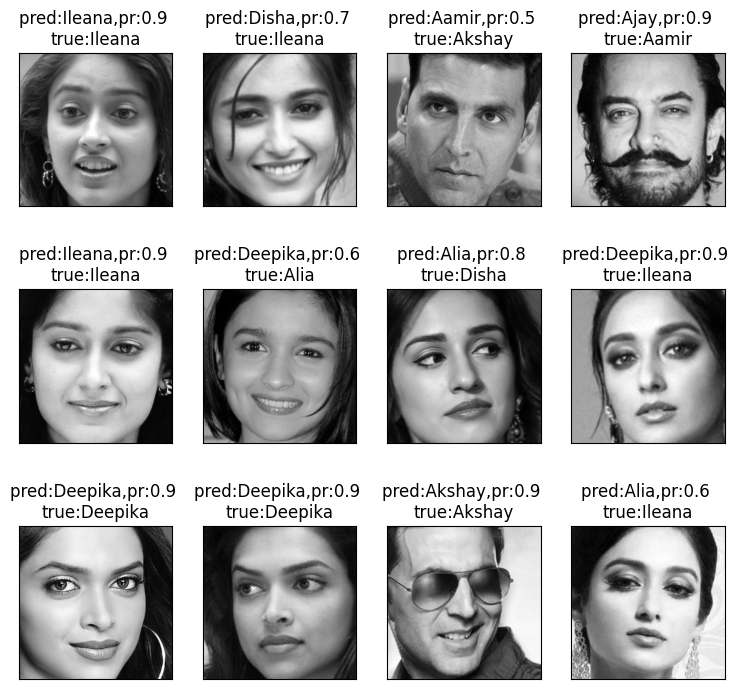

In [19]:
ypred,yprob=[],[]
for test_face in xtest_lda:
    prob=clf.predict_proba([test_face])[0]
    class_id=np.where(prob==np.max(prob))[0][0]
    ypred.append(class_id)
    yprob.append(np.max(prob))
    
ypred=np.array(ypred)
pred_title=[]
tp=0
for i in range(ypred.shape[0]):
    tn=class_name[ytest[i]]
    pn=class_name[ypred[i]]
    result='pred:%s,pr:%s \ntrue:%s'%(pn,str(yprob[i])[0:3],tn)
    pred_title.append(result)
    if tn==pn:
        tp=tp+1
        
print(f'accuracy:{tp*100/ypred.shape[0]}')
plot_gallery(xtest,pred_title,h,w)
plt.show()
    